In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path="videos\ADS HG.MP4"
cap = cv2.VideoCapture(path)
frames = []
for i in range(10):
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)
cap.release()
frames = np.array(frames)


In [ ]:
path="videos\\ADS HG.MP4"
path2="test_files\\test_file1"
import cv2
vidcap = cv2.VideoCapture(path)
success,image = vidcap.read()
count = 0
for i in range(120*20):
  try:
    cv2.imwrite("test_files\\frame%d.jpg" % count, image)     # save frame as JPEG file      
  except:
    print("error")
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1



In [31]:
def input_given(frame:np.ndarray)->bool:
    rectanglex1y1=(662,864)
    rectanglex2y2=(1608,1070)
    x_box=frame[rectanglex1y1[0]:rectanglex2y2[0]-rectanglex2y2[0],rectanglex1y1[1]:rectanglex2y2[1]-rectanglex2y2[1]]
    plt.imshow(x_box)
    #check if blue color is present in the box
    if np.any(x_box[:,:,2]>200):
        return True
    return False

In [1]:
import cv2

In [3]:
frame=cv2.imread("test_file2/frame0.jpg")
#convert to rgb
frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

In [4]:
frame.shape

(1080, 1920, 3)

In [5]:
rectanglex1y1=(680,850)
rectanglex2y2=(1610,1050)
#extract only the rectanglur area from frame which comes under rectangle diagonal as (662,864) and (1608,1070)
x_box=frame[rectanglex1y1[1]:rectanglex2y2[1],rectanglex1y1[0]:rectanglex2y2[0]]
cv2.imwrite("x_box.jpg",x_box)




True

In [35]:
if np.any(x_box[:,:,2]>200):
    print( True)

True


ValueError: zero-size array to reduction operation minimum which has no identity

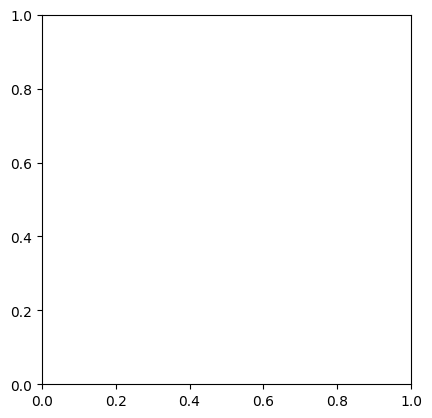

In [25]:
input_given(x_box)

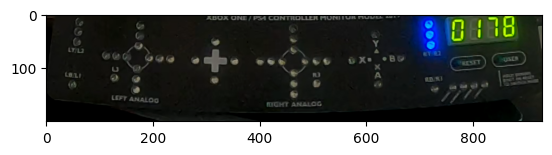

In [12]:
plt.imshow(x_box)

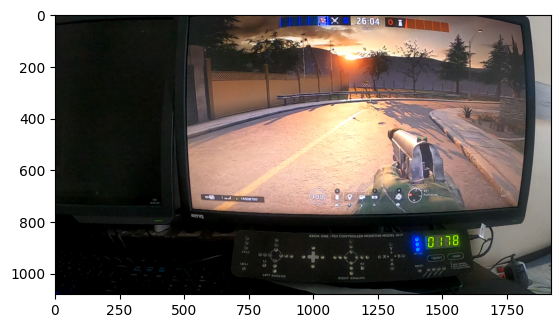

In [11]:
import matplotlib.pyplot as plt
plt.imshow(frame,cmap="rainbow")

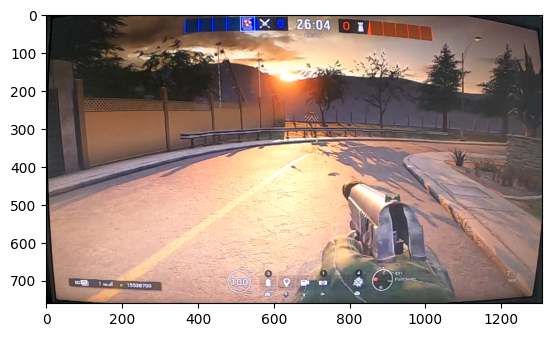

In [13]:


screen=frame[screenx1y1[1]:screenx2y2[1],screenx1y1[0]:screenx2y2[0]]
plt.imshow(screen)


In [21]:
screenx1y1=(504,0)
screenx2y2=(1812,760)

In [14]:
cap = cv2.VideoCapture("videos\\ADS HG.MP4")
frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)
cap.release()

In [21]:
len(frames)

233

In [ ]:
#calculate the diffrence in the frame using bitwise
def diffrence(frame1,frame2):
    diff=cv2.absdiff(frame1,frame2)
    return diff

#if the diffrence is greater than 30 then it is a movement
def movement(diff):
    if np.any(diff>30):
        return True
    return False

# if input was given and then it is a movement then save the frame as a image
def save_frame(frame):
    cv2.imwrite("test_files\\frame%d.jpg" % count, frame)     # save frame as JPEG file

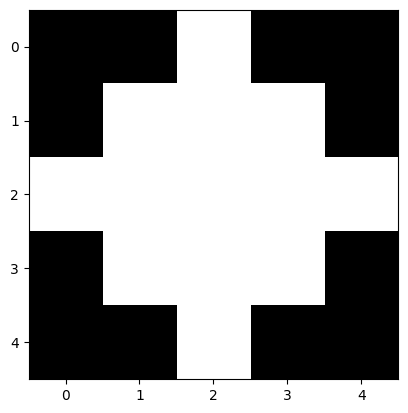

In [8]:
diamond=np.array([[0,0,1,0,0],

[0,1,1,1,0],

[1,1,1,1,1],

[0,1,1,1,0],

[0,0,1,0,0]])

plt.imshow(diamond,cmap="gray")


In [6]:
import matplotlib.pyplot as plt

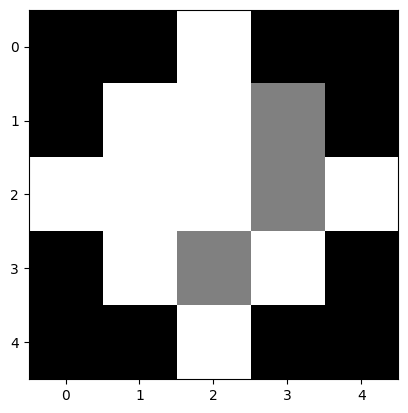

In [13]:
diamond2=np.array([[0,0,1,0,0],

[0,1,1,0.5,0],

[1,1,1,0.5,1],

[0,1,0.5,1,0],

[0,0,1,0,0]])


plt.imshow(diamond2,cmap="gray")


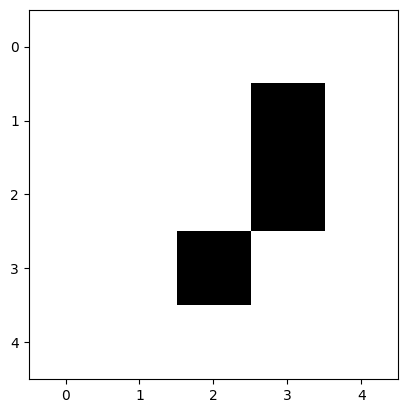

In [17]:
plt.imshow(diamond2-diamond,cmap="gray")

In [21]:
np.sum(np.abs(diamond2-diamond))

1.5

In [22]:
path="test_files"
import os

x=list(range(len(os.listdir(path))))
y=[]

files=os.listdir(path)
for i in range(len(files)-1):
    frame1=path+"\\"+files[i]
    frame2=path+"\\"+files[i+1]
    frame1=cv2.imread(frame1)
    frame2=cv2.imread(frame2)
    screen=frame1[screenx1y1[1]:screenx2y2[1],screenx1y1[0]:screenx2y2[0]]
    screen2=frame2[screenx1y1[1]:screenx2y2[1],screenx1y1[0]:screenx2y2[0]]
    distance=np.sum(np.abs(screen-screen2))
    y.append(distance)  

In [23]:
max(y)

411191952

In [24]:
x.pop()

2387

In [25]:
y=np.array(y)/max(y)

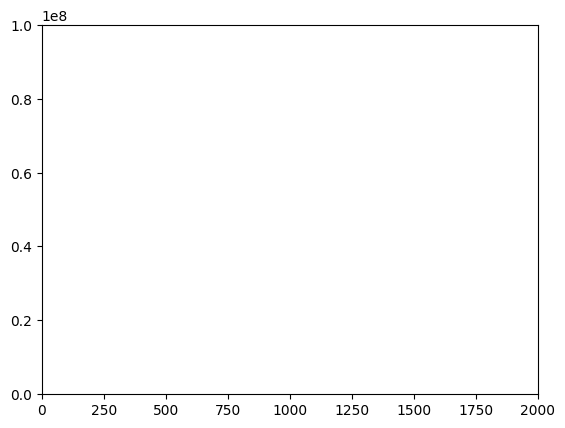

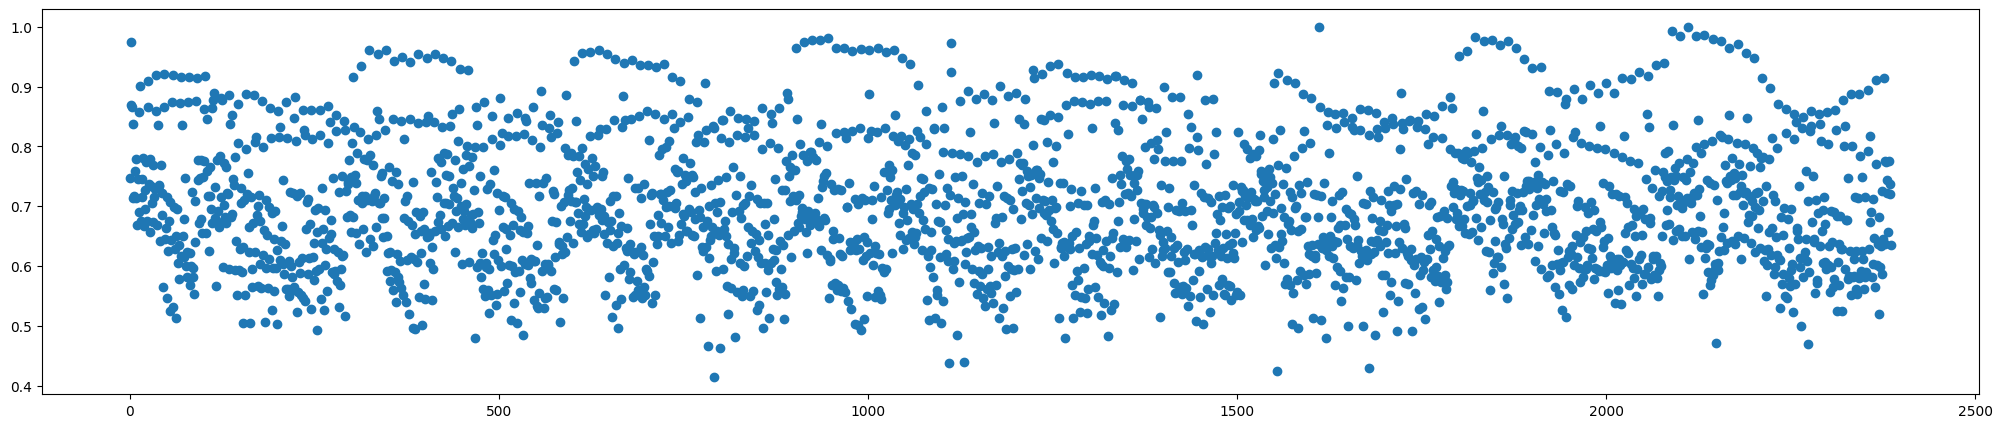

In [26]:
plt.xlim(0,2000)
plt.ylim(0,100000000)
#fix size of plot to (25,10)
plt.figure(figsize=(25,5))
plt.scatter(x,y)


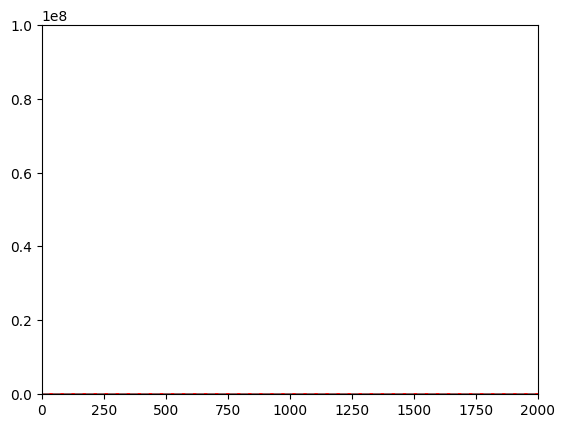

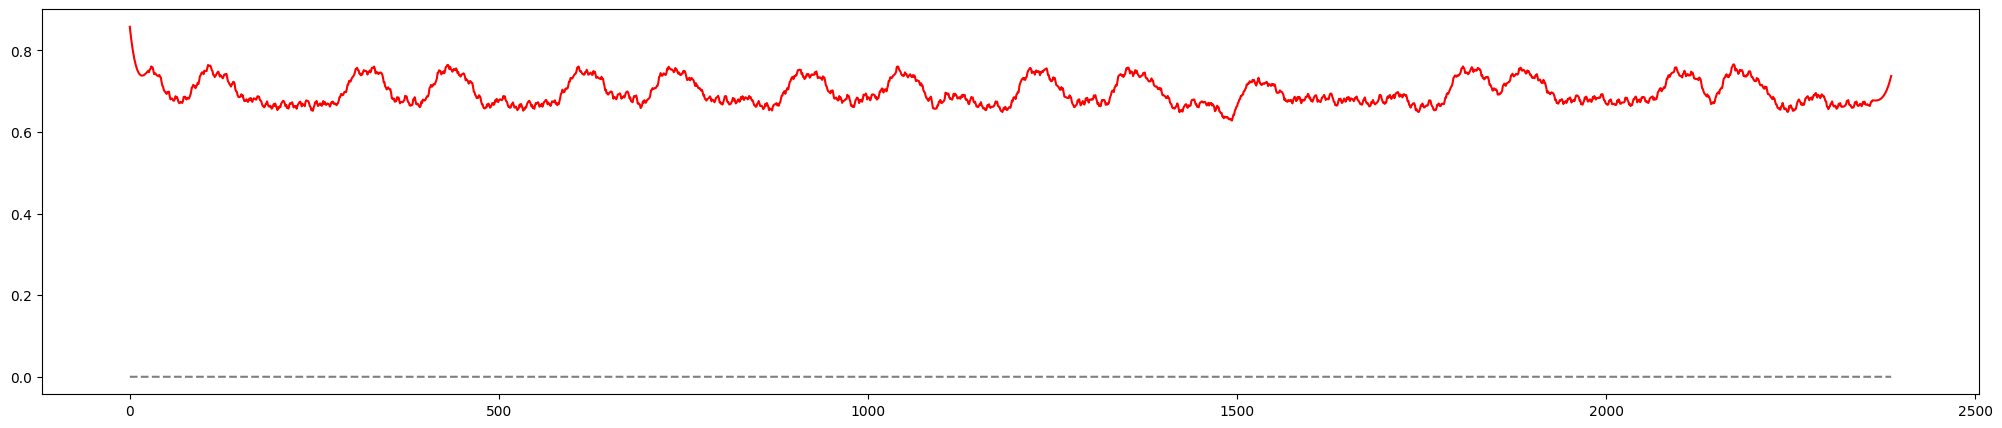

In [27]:
from scipy.signal import savgol_filter
yhat = savgol_filter(y, 51, 3) 
plt.plot(x,yhat, color='red')

from scipy.signal import find_peaks

peaks, _ = find_peaks(yhat, height=10000000)
plt.plot(x,yhat, color='red')

plt.plot(peaks, yhat[peaks], "x")

plt.plot(np.zeros_like(yhat), "--", color="gray")

plt.xlim(0,2000)
plt.ylim(0,100000000)
plt.figure(figsize=(25,5))
#plt.scatter(x,y)
plt.plot(x,yhat, color='red')
#plt.plot(peaks, yhat[peaks], "x")
plt.plot(np.zeros_like(yhat), "--", color="gray")



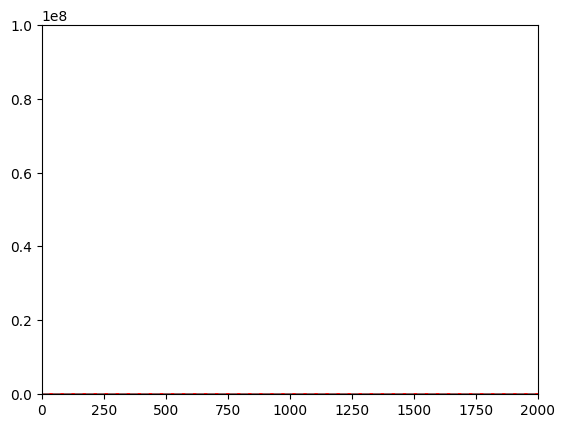

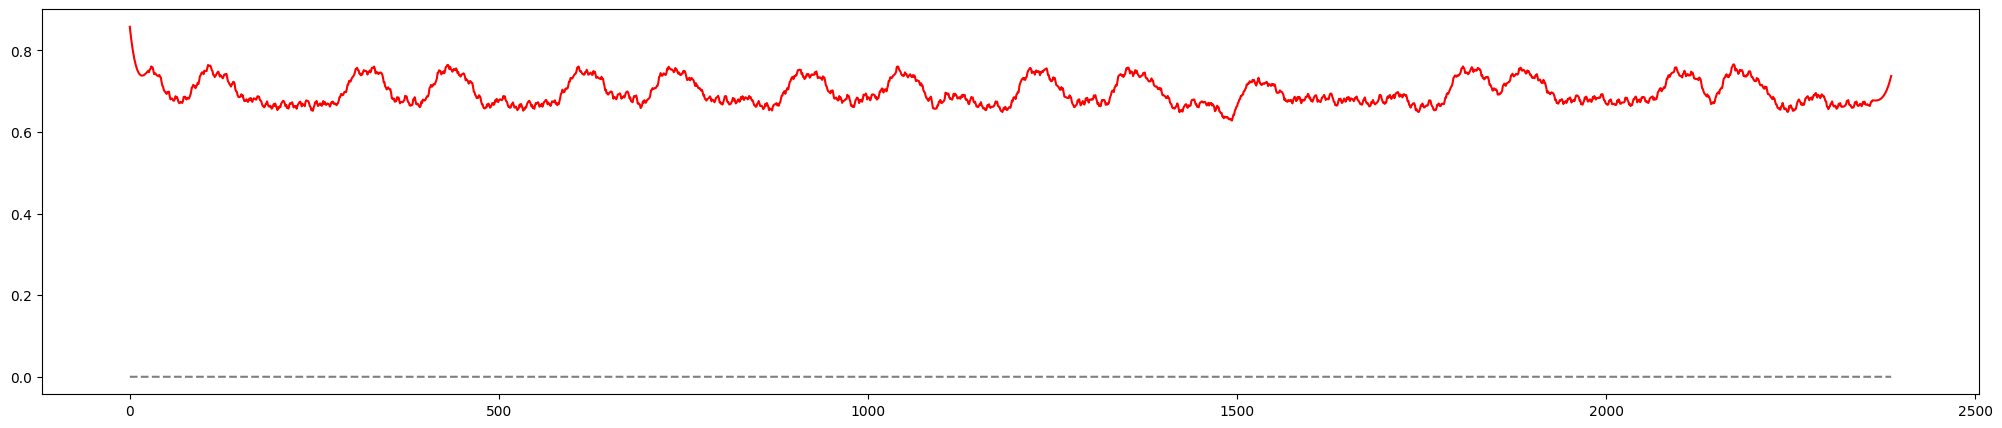

In [7]:
from scipy.signal import savgol_filter
yhat = savgol_filter(y, 51, 3) 
plt.plot(x,yhat, color='red')

from scipy.signal import find_peaks

peaks, _ = find_peaks(yhat, height=10000000)
plt.plot(x,yhat, color='red')

plt.plot(peaks, yhat[peaks], "x")

plt.plot(np.zeros_like(yhat), "--", color="gray")

plt.xlim(0,2000)
plt.ylim(0,100000000)
plt.figure(figsize=(25,5))
#plt.scatter(x,y)
plt.plot(x,yhat, color='red')
#plt.plot(peaks, yhat[peaks], "x")
plt.plot(np.zeros_like(yhat), "--", color="gray")




In [37]:
#save y and x in a json file in same directory
import json
with open('y.json', 'w') as f:
    json.dump(y.tolist(), f)
with open('x.json', 'w') as f:
    json.dump(x, f)


In [4]:
import json
import matplotlib.pyplot as plt
import numpy as np


NameError: name 'yhat' is not defined

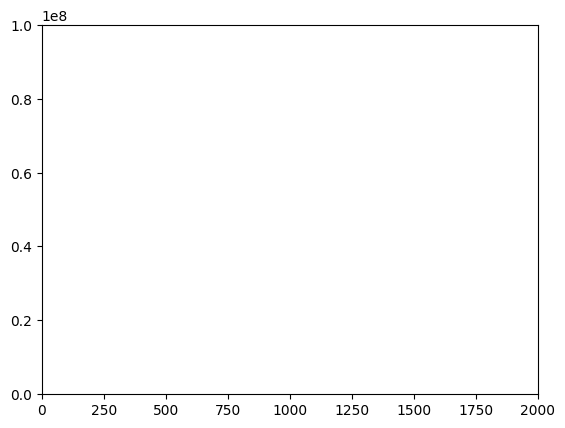

<Figure size 2500x500 with 0 Axes>

In [5]:
#get x and y from json file
with open('y.json') as f:
    y = json.load(f)

with open('x.json') as f:
    x = json.load(f)

y=np.array(y)
x=np.array(x)

#plot the graph
plt.xlim(0,2000)
plt.ylim(0,100000000)
plt.figure(figsize=(25,5))
#plt.scatter(x,y)
plt.plot(x,yhat, color='red')
#plt.plot(peaks, yhat[peaks], "x")
plt.plot(np.zeros_like(yhat), "--", color="gray")


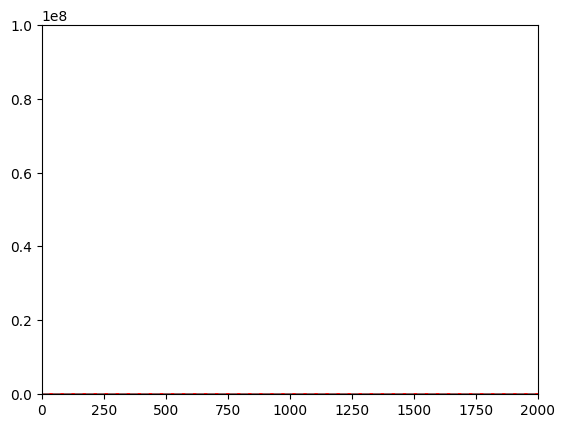

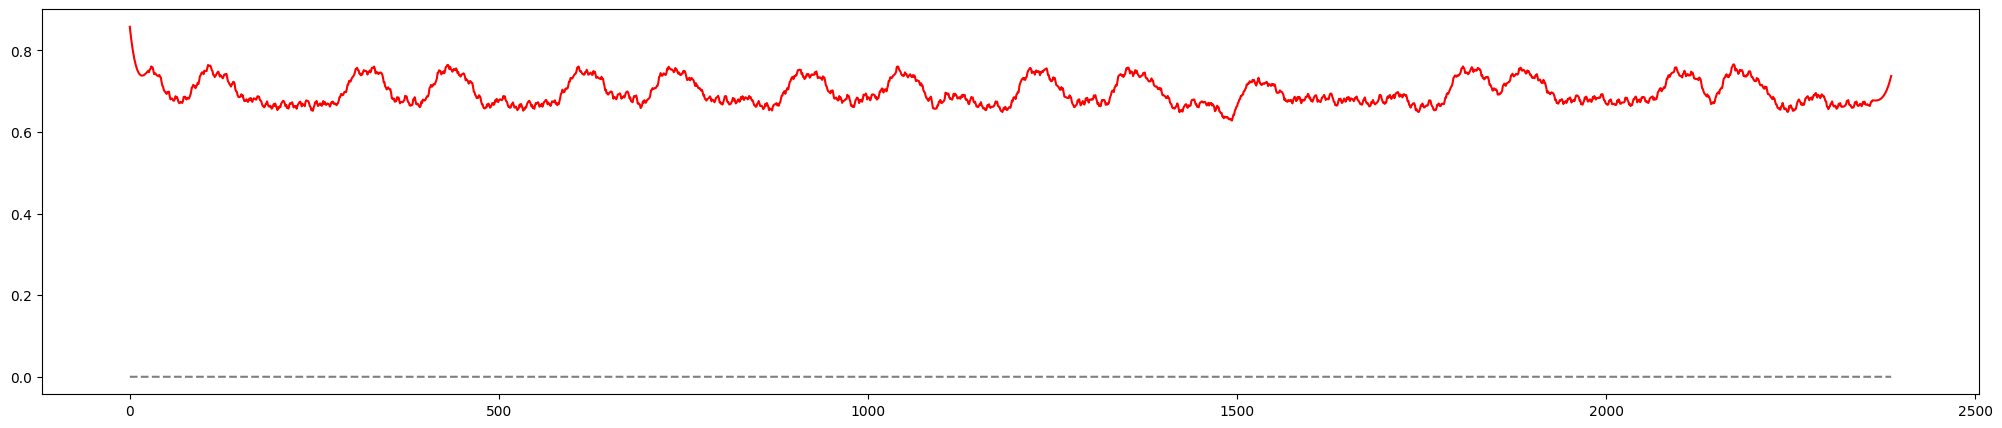

In [8]:
from scipy.signal import savgol_filter
yhat = savgol_filter(y, 51, 3) 
plt.plot(x,yhat, color='red')

from scipy.signal import find_peaks

peaks, _ = find_peaks(yhat, height=10000000)
plt.plot(x,yhat, color='red')

plt.plot(peaks, yhat[peaks], "x")

plt.plot(np.zeros_like(yhat), "--", color="gray")

plt.xlim(0,2000)
plt.ylim(0,100000000)
plt.figure(figsize=(25,5))
#plt.scatter(x,y)
plt.plot(x,yhat, color='red')
#plt.plot(peaks, yhat[peaks], "x")
plt.plot(np.zeros_like(yhat), "--", color="gray")




In [9]:
#get noise mean
noise_mean=np.mean(yhat[0:100])



In [10]:
print(noise_mean)

0.722970232035334


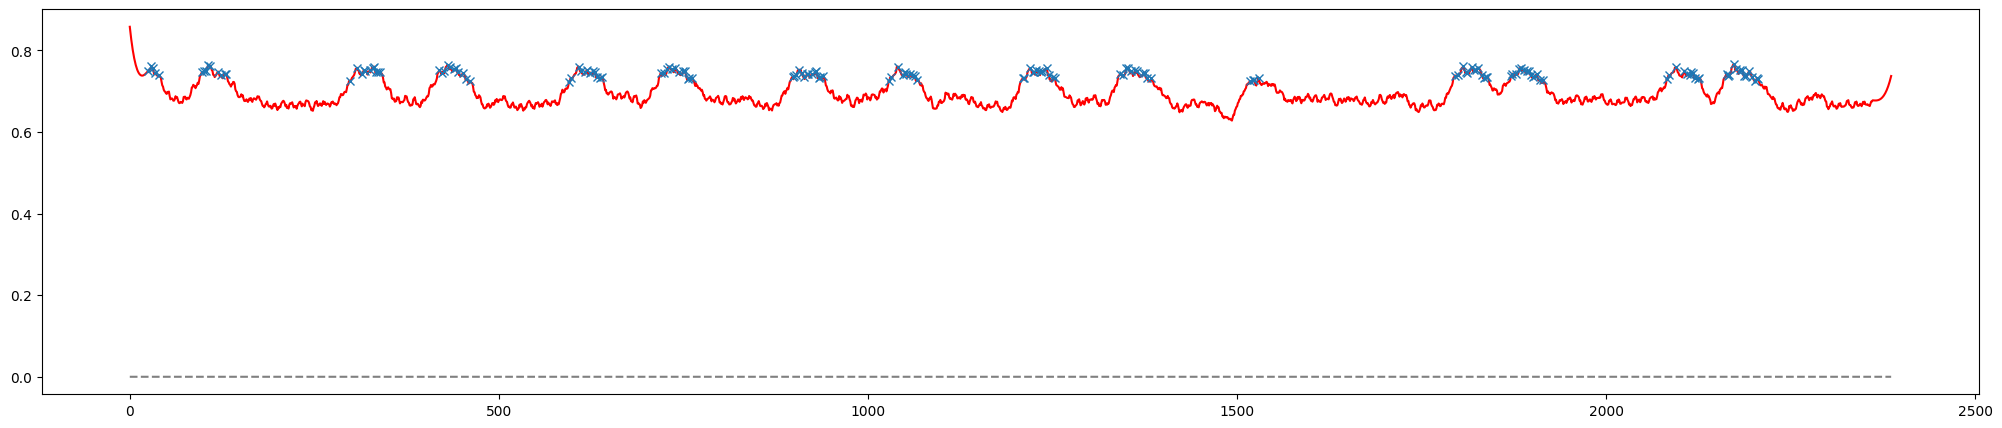

In [12]:
#get peaks and their values
peaks, _ = find_peaks(yhat, height=noise_mean)
plt.figure(figsize=(25,5))
plt.plot(x,yhat, color='red')
plt.plot(peaks, yhat[peaks], "x")
plt.plot(np.zeros_like(yhat), "--", color="gray")

    

In [18]:
#get average values at peak
peak_values=[]
for i in range(len(peaks)):
    peak_values.append(yhat[peaks[i]])

print(peak_values)




[0.7524529132637293, 0.7493957916311724, 0.6737538112966512, 0.7489313969449733, 0.7624022414741779, 0.7415906187406207, 0.7407903645359412, 0.7371842028594218, 0.7407583979244622, 0.7406630175361981, 0.7574124775270029, 0.7436251600848856, 0.665521320970206, 0.7441676749761804, 0.7616298163965423, 0.7523310240140527, 0.7357952529730807, 0.7252360776949344, 0.7229692446420564, 0.7535873844675219, 0.7466698744261113, 0.7402472973589663, 0.7403790192238326, 0.7293527004168864, 0.7374501953859627, 0.7531753261685081, 0.7498210050607962, 0.740478734417372, 0.7341167455602742, 0.7265992276491409, 0.7291840314741999, 0.7450529833638485, 0.735207264860315, 0.7386462660554891, 0.7401117979821302, 0.7411742921862416, 0.7301611049843053, 0.7243455384472522, 0.7501817626143413, 0.7416373760087974, 0.7347518613103429, 0.7310431308995452, 0.7284171190277986, 0.753784187426773, 0.7403684728379311, 0.7464133962107941, 0.752837244620908, 0.72419310742642, 0.6836369129600223, 0.7389505627025853, 0.7516

Next experiment for next video

In [2]:
path="videos\\ADS HG.MP4"
import cv2
vidcap = cv2.VideoCapture(path)
success,image = vidcap.read()
count = 0
for i in range(120*20):
  try:
    cv2.imwrite("test_files\\frame%d.jpg" % count, image)     # save frame as JPEG file      
  except:
    print("error")
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1


Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

In [3]:
path="videos\\Crouch.MP4"
import cv2
vidcap = cv2.VideoCapture(path)
success,image = vidcap.read()
count = 0
for i in range(120*20):
  try:
    cv2.imwrite("test_file2\\frame%d.jpg" % count, image)     # save frame as JPEG file      
  except:
    print("error")
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

In [7]:
frame=cv2.imread("test_file2/frame0.jpg")

AttributeError: 'NoneType' object has no attribute 'shape'

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [100]:
frame=cv2.imread("test_file2/frame0.jpg")
#convert to rgb
frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

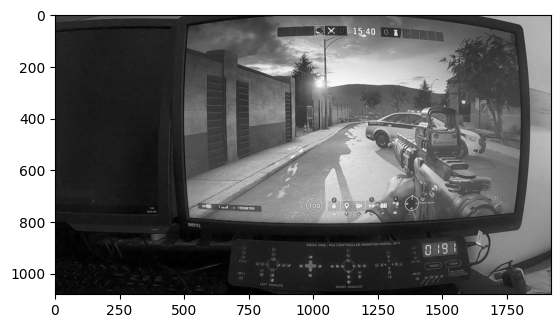

In [102]:
plt.imshow(frame,cmap='gray')

In [4]:
frame.shape

(1080, 1920, 3)

In [5]:
import matplotlib.pyplot as plt

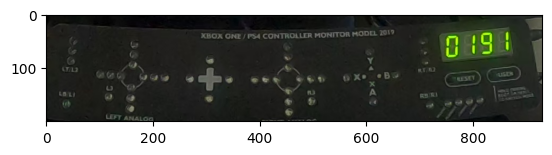

In [6]:
rectanglex1y1=(680,850)
rectanglex2y2=(1610,1050)
#extract only the rectanglur area from frame which comes under rectangle diagonal as (662,864) and (1608,1070)
x_box=frame[rectanglex1y1[1]:rectanglex2y2[1],rectanglex1y1[0]:rectanglex2y2[0]]
plt.imshow(x_box)


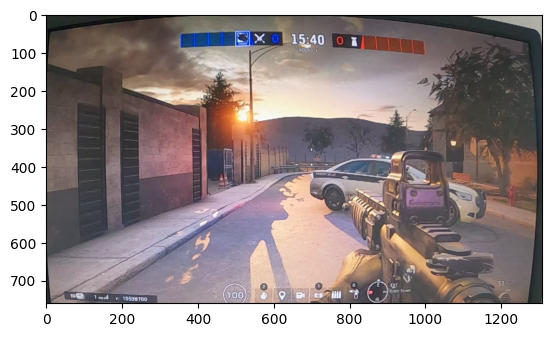

In [7]:
screenx1y1=(504,0)
screenx2y2=(1812,760)



screen=frame[screenx1y1[1]:screenx2y2[1],screenx1y1[0]:screenx2y2[0]]
plt.imshow(screen)

In [8]:
import numpy as np

In [16]:
path="test_file2"
import os

x=list(range(len(os.listdir(path))))
y=[]

files=os.listdir(path)
for i in range(len(files)-1):
    frame1=path+"\\"+files[i]
    frame2=path+"\\"+files[i+1]
    frame1=cv2.imread(frame1)
    frame2=cv2.imread(frame2)
    frame1=cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    frame2=cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    screen=frame1[screenx1y1[1]:screenx2y2[1],screenx1y1[0]:screenx2y2[0]]
    screen2=frame2[screenx1y1[1]:screenx2y2[1],screenx1y1[0]:screenx2y2[0]]
    distance=np.sum(np.abs(screen-screen2))
    y.append(distance)  

In [17]:
max(y)

506291426

In [18]:
x.pop()

2373

In [20]:
#store x and y in x_1.json and y_1.json
import json
with open('x_1.json', 'w') as f:
    json.dump(x, f)
    
with open('y_1.json', 'w') as f:
    json.dump(y, f)


In [14]:
y=np.array(y)/max(y)

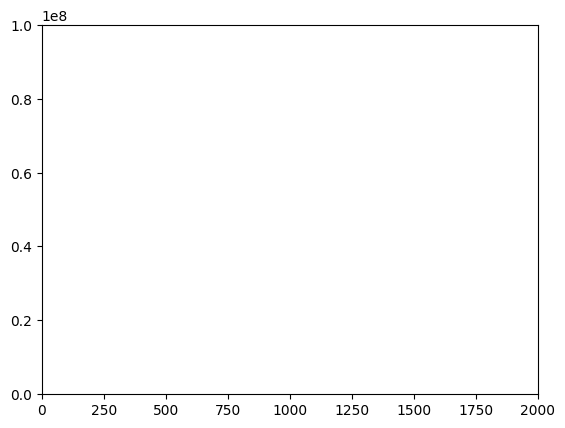

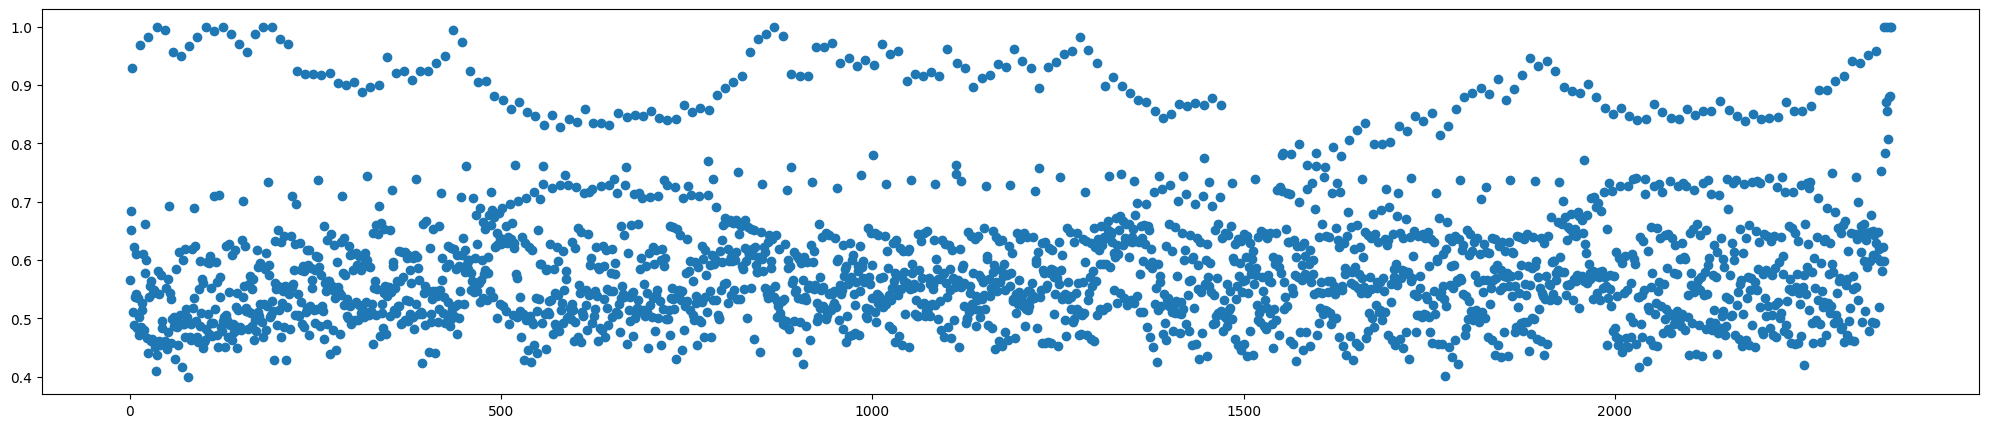

In [21]:
plt.xlim(0,2000)
plt.ylim(0,100000000)
#fix size of plot to (25,10)
plt.figure(figsize=(25,5))
plt.scatter(x,y)


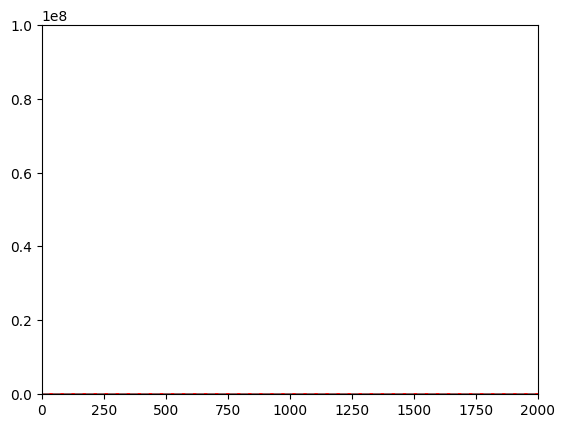

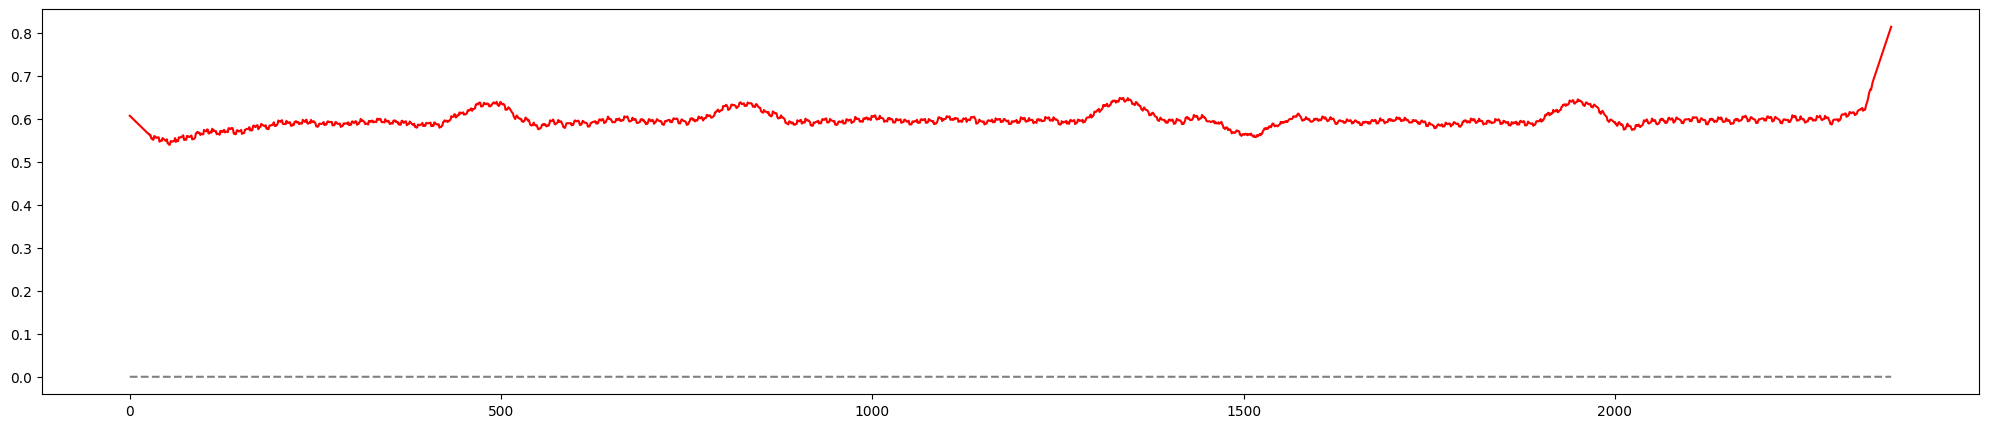

In [22]:
from scipy.signal import savgol_filter
yhat = savgol_filter(y, 51, 1) 
plt.plot(x,yhat, color='red')

from scipy.signal import find_peaks

peaks, _ = find_peaks(yhat, height=10000000)
plt.plot(x,yhat, color='red')

plt.plot(peaks, yhat[peaks], "x")

plt.plot(np.zeros_like(yhat), "--", color="gray")

plt.xlim(0,2000)
plt.ylim(0,100000000)
plt.figure(figsize=(25,5))
#plt.scatter(x,y)
plt.plot(x,yhat, color='red')
#plt.plot(peaks, yhat[peaks], "x")
plt.plot(np.zeros_like(yhat), "--", color="gray")

In [23]:
# these graph can be approximated by using relu 
# function window over interval of let us say 5
#  then we will get a maximum latency of 20 ms 
# with 240 fps Let see what will happen


In [127]:
def sliding_windows(y_hat,length=5):
    ending=y_hat.shape[0]
    sigmoid=[0]*ending
    average=0
    for i in range(0,ending,length):
        average=np.mean(y_hat[i:i+length])
        for j in range(i,i+length):
            sigmoid[j]=average

    return sigmoid

IndexError: list assignment index out of range

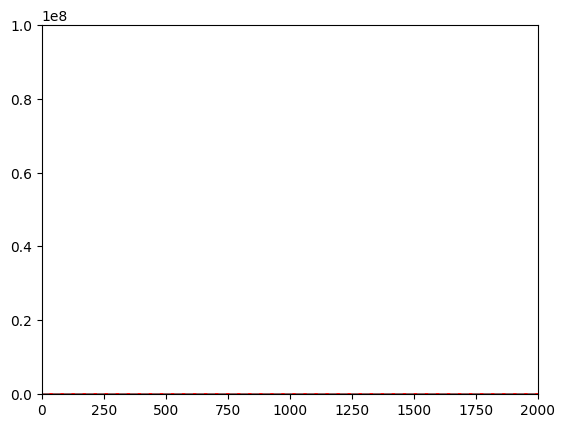

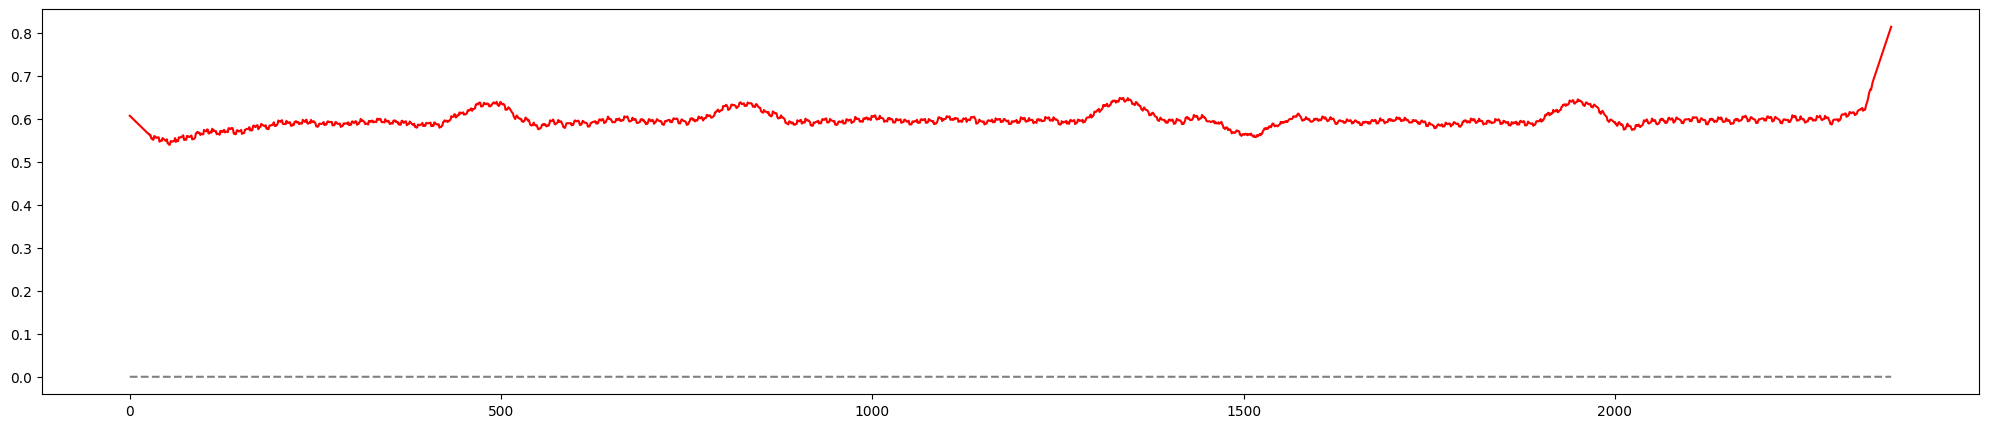

In [128]:
from scipy.signal import savgol_filter
yhat = savgol_filter(y, 51, 1) 
plt.plot(x,yhat, color='red')

from scipy.signal import find_peaks

peaks, _ = find_peaks(yhat, height=10000000)
plt.plot(x,yhat, color='red')

plt.plot(peaks, yhat[peaks], "x")

plt.plot(np.zeros_like(yhat), "--", color="gray")

plt.xlim(0,2000)
plt.ylim(0,100000000)
plt.figure(figsize=(25,5))
#plt.scatter(x,y)
plt.plot(x,yhat, color='red')
#plt.plot(peaks, yhat[peaks], "x")
plt.plot(np.zeros_like(yhat), "--", color="gray")

plt.plot(sliding_windows(yhat),"--",color="blue")


In [46]:
def get_mean(peak,y):
    mean=y-peak
    return np.mean(mean)


In [47]:
peaks

array([], dtype=int64)

In [64]:
#subtract the mean from yhat
yhat=yhat-np.mean(yhat)

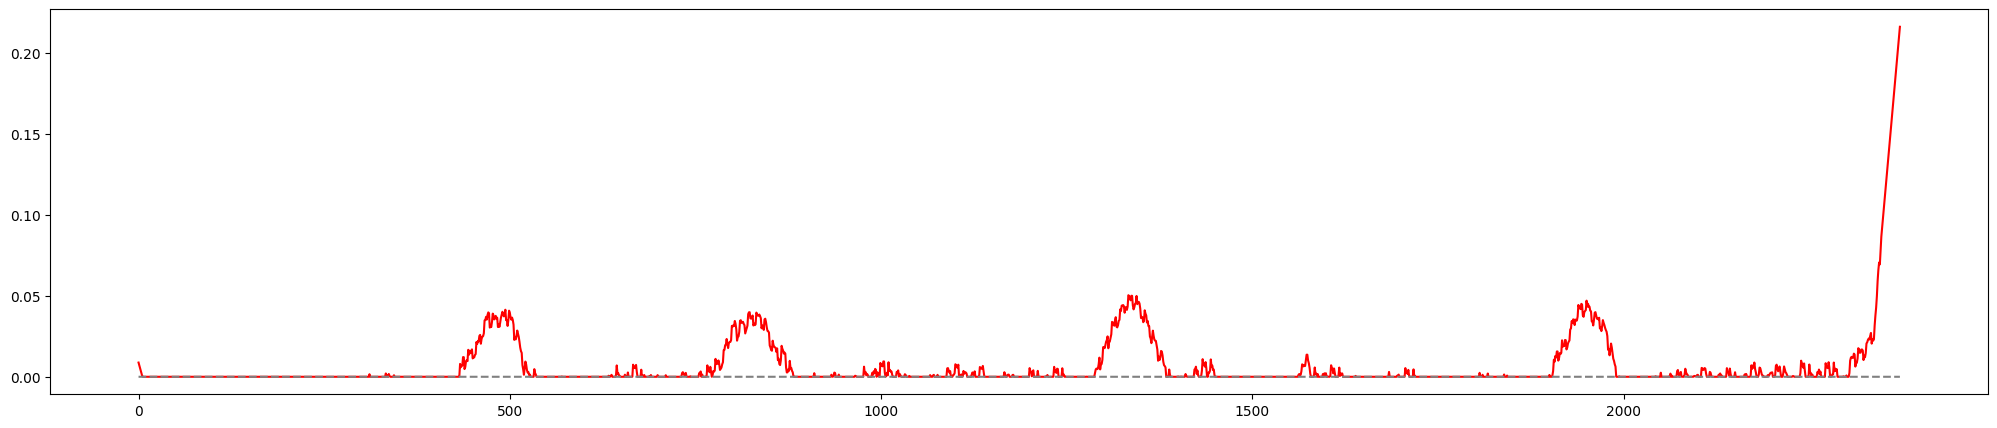

In [104]:
#plot the graph
plt.figure(figsize=(25,5))
plt.plot(x,yhat, color='red')
plt.plot(np.zeros_like(yhat), "--", color="gray")


In [129]:
for i in sliding_windows(yhat):
    print(i)

IndexError: list assignment index out of range

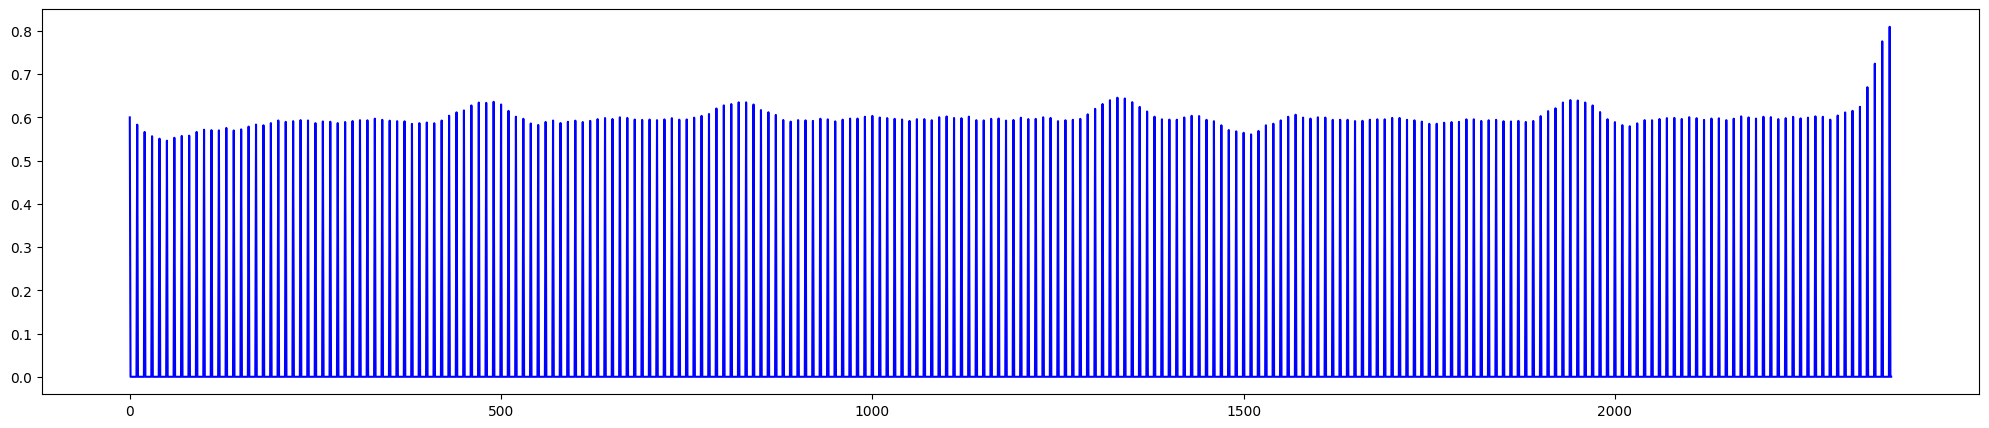

In [125]:
#approximate it to relu function
plt.figure(figsize=(25,5))
plt.plot(sliding_windows(yhat,length=10),color="blue")



In [73]:
#relu function over yhat
def relu(yhat):
    for i in range(yhat.shape[0]):
        if yhat[i]<0:
            yhat[i]=0

    return yhat

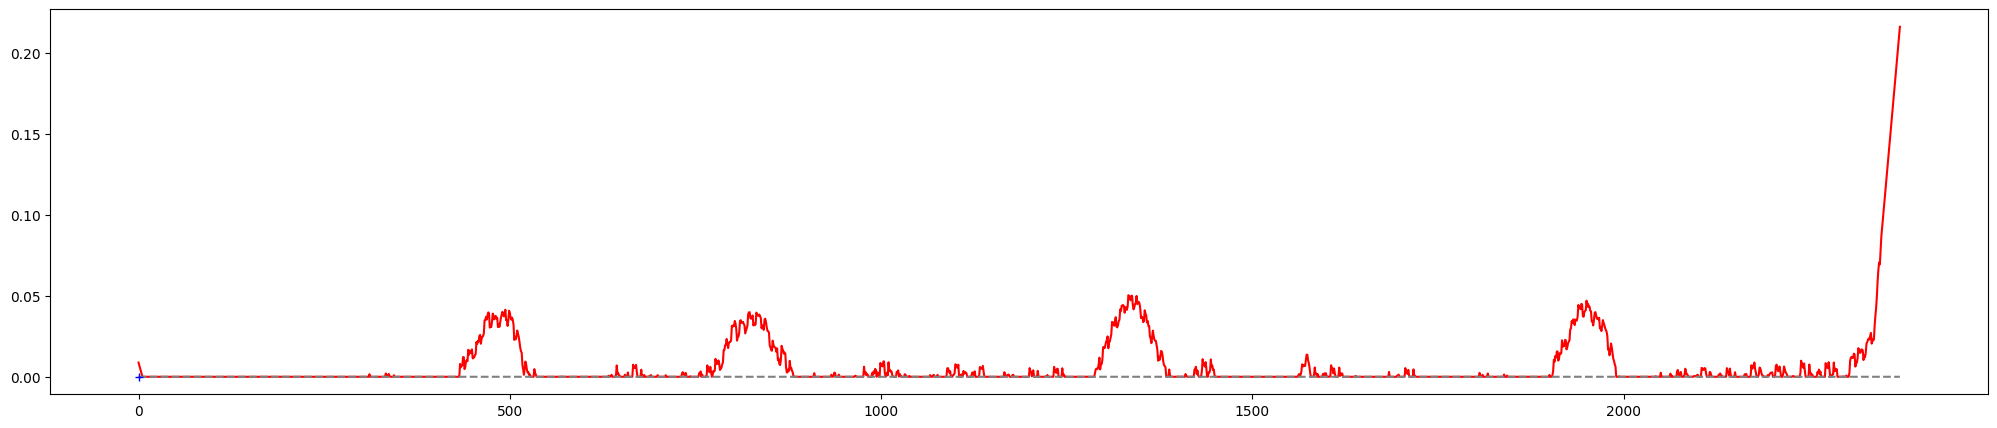

In [77]:
#plot the graph
plt.figure(figsize=(25,5))
plt.plot(x,relu(yhat), color='red')
plt.plot(np.zeros_like(yhat), "--", color="gray")
#plot the mean of yhat 


In [80]:
def process(yhat):
    mean=np.mean(relu(yhat))
    return relu(yhat-mean)


In [94]:
h=x[0:yhat.shape[0]-93]
b=yhat[0:yhat.shape[0]-93]

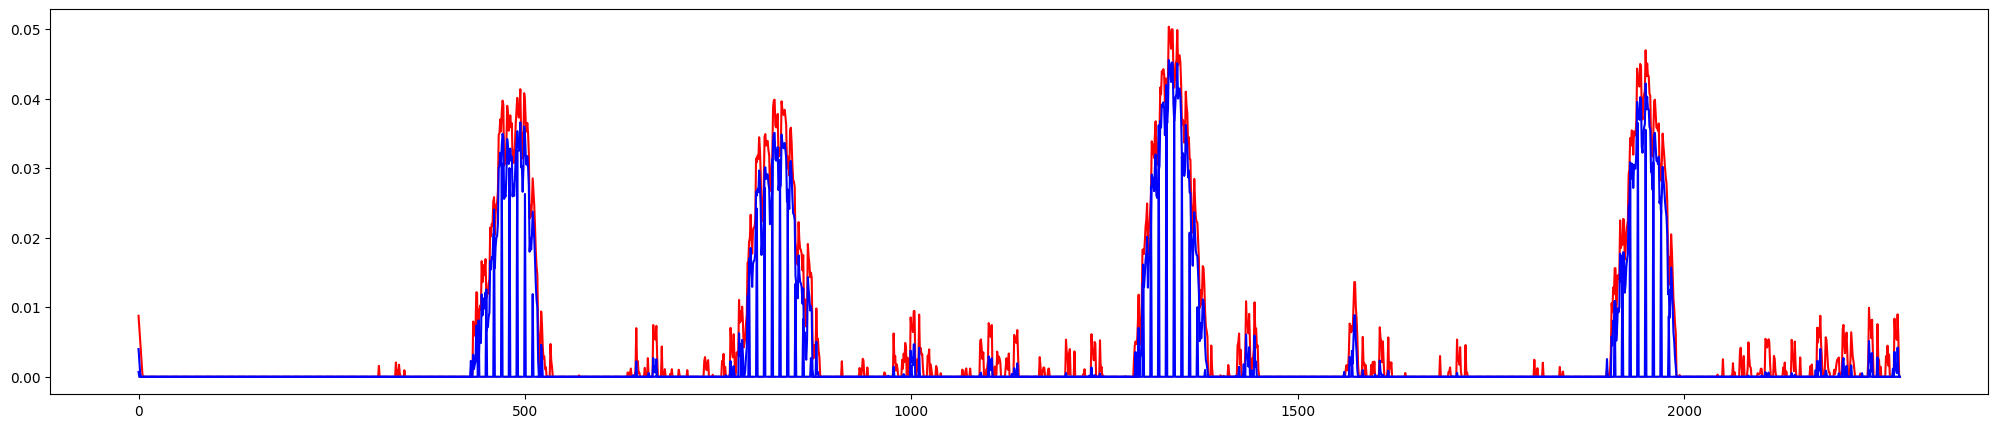

In [95]:
plt.figure(figsize=(25,5))
plt.plot(h,relu(b), color='red')
plt.plot(np.zeros_like(b), "--", color="gray")
plt.plot(h,process(b),color="blue")
plt.plot(sliding_windows(process(b),length=10),color="blue")


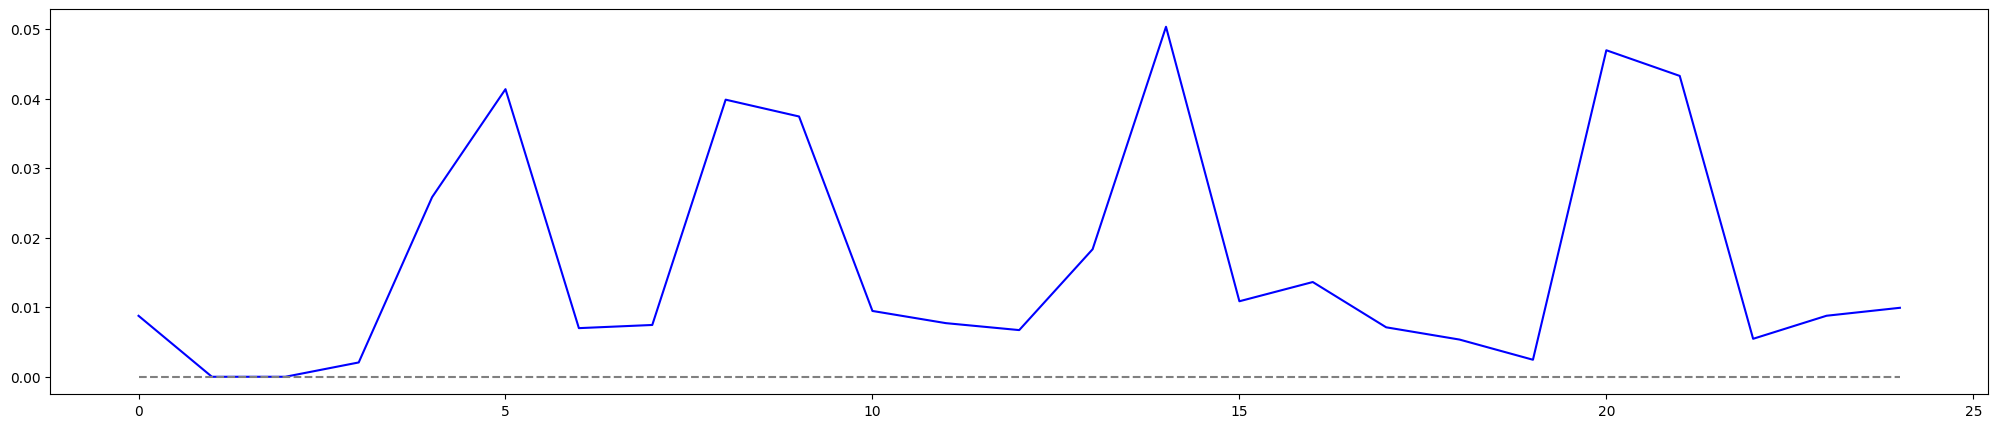

In [122]:
#frame wise get the peak of the graph
window_wise_peaks=[]
for i in range(0,yhat.shape[0]-93,93):
    window_wise_peaks.append(np.max(relu(b[i:i+93])))

#plot the graph
plt.figure(figsize=(25,5))
plt.plot(window_wise_peaks,color="blue")
plt.plot(np.zeros_like(window_wise_peaks), "--", color="gray")


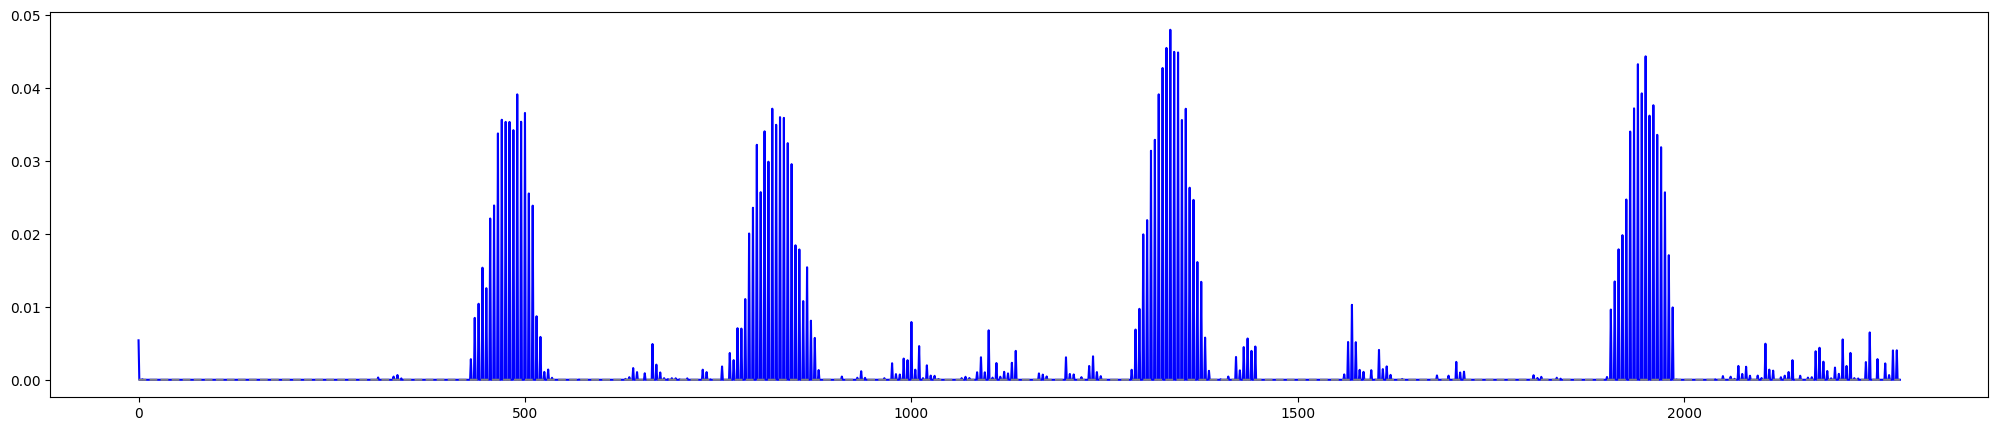

In [119]:
#plot the sliding window of the graph
plt.figure(figsize=(25,5))
plt.plot(sliding_windows(b,length=5),color="blue")
plt.plot(np.zeros_like(b), "--", color="gray")


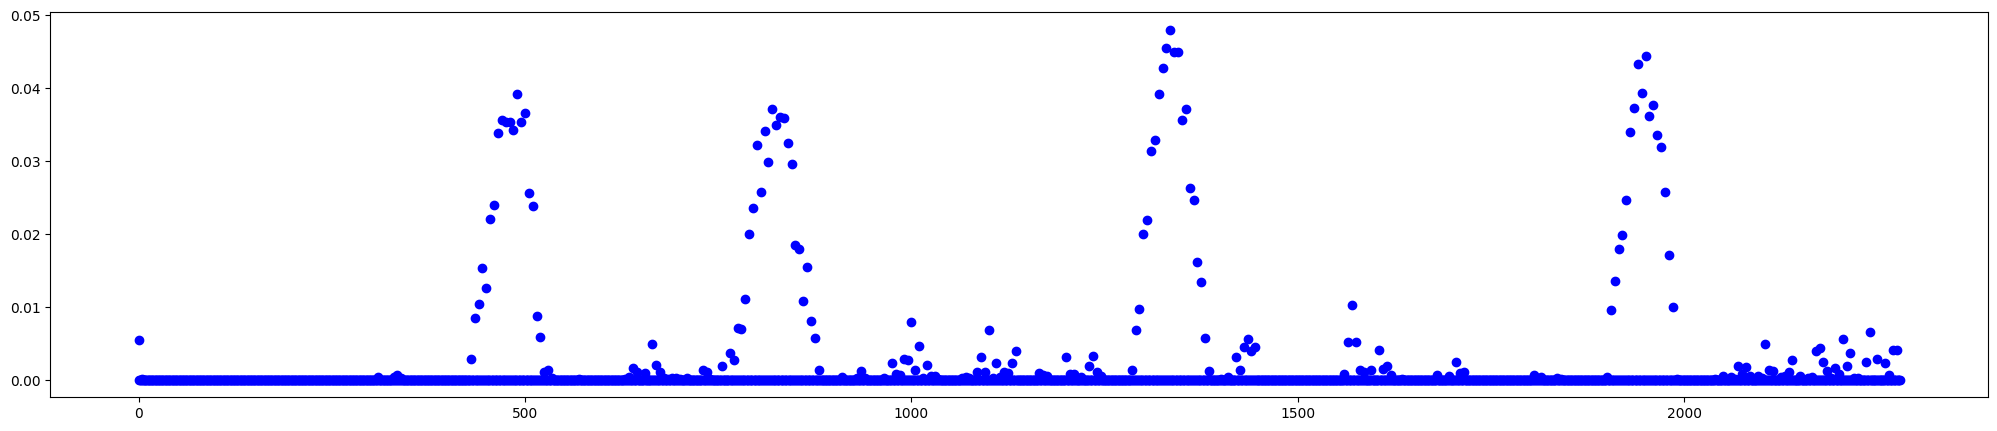

In [116]:
#scatter plot the sliding windows
plt.figure(figsize=(25,5))
plt.scatter(h,sliding_windows(b,length=5),color="blue")


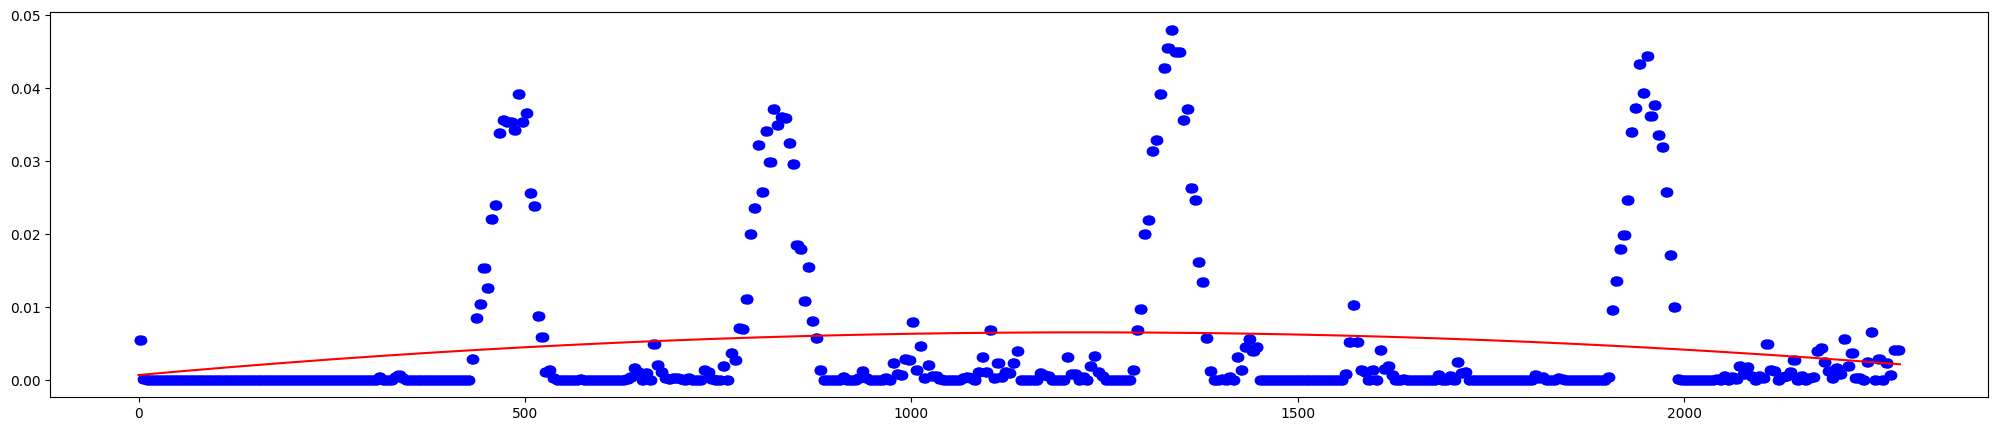

In [130]:
#apply polynomial regression on b 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model = Pipeline([('poly', PolynomialFeatures(degree=2)),

                    ('linear', LinearRegression(fit_intercept=False))])


model = model.fit(np.array(h).reshape(-1,1), np.array(sliding_windows(b,length=5)).reshape(-1,1))

y_plot = model.predict(np.array(h).reshape(-1,1))

plt.figure(figsize=(25,5))
plt.scatter(h,sliding_windows(b,length=5),color="blue")
plt.plot(h,y_plot,color="red")



In [2]:
import numpy as np

In [1]:
import cv2

In [26]:
x_box=cv2.imread("x_box.jpg")
camera=cv2.VideoCapture("videos\\ADS HG.MP4")

# Python program to illustrate
# template matching
import cv2
import numpy as np

# Read the main image
img_rgb = cv2.imread('mainimage.jpg')

# Convert it to grayscale
img_gray = cv2.imread("test_file2\\frame0.jpg")
#img_gray= cv2.resize(img_gray,(1000,1000))

# Read the template
template = cv2.imread("x_box.jpg")

# Store width and height of template in w and h
w, h,_ = template.shape[::-1]

# Perform match operations.
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

# Specify a threshold
threshold = 0.8

# Store the coordinates of matched area in a numpy array
loc = np.where(res >= threshold)

# Draw a rectangle around the matched region.
for pt in zip(*loc[::-1]):
	cv2.rectangle(img_gray, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)
	print("hi")
# Show the final image with the matched area.
cv2.imshow('Detected', img_gray)
cv2.waitKey(0)

hi
hi
hi
hi
hi


-1

In [17]:
type(img_gray)

cv2.VideoCapture

In [27]:
a=[1,2,3]

a.append(0) if 2==2 else a.append(5)

In [28]:
a

[1, 2, 3, 0]